In [1]:
using LightGraphs, DifferentialEquations
using Plots
using NLsolve
using Optim
using LaTeXStrings

include("NetworkOptimization.jl")
using NetworkOptimization
using OscillatorNetworks

pyplot();

In [2]:
function kuramoto_order(δs)    
    return abs(mean(exp.(im*δs)))
end

netw_size = 8
γ = 0.5

grid_type = "square"

topol = nothing
if grid_type == "square"
    topol = OscillatorNetworks.square_grid_network(netw_size, γ)
elseif grid_type == "triang"
    topol = OscillatorNetworks.triang_grid_network(netw_size, γ)
end

# R = OscillatorNetworks.random_correlation_matrix(topol)
# R = OscillatorNetworks.isotropic_gaussian_correlation_matrix(topol, 1/2.0);
# R = OscillatorNetworks.isotropic_exponential_correlation_matrix(topol, 0.5)

R_uncor = OscillatorNetworks.uncorrelated_correlation_matrix(topol);

Figure 1: White Noise 
===

In [7]:
function sample_white_noise(R, N, samples, topol)
    power_flows = NetworkOptimization.white_noise_general

    b_totals = linspace(0.1, 1.5, N)
    αs = linspace(0.1, 1.5, N)

    tolerance = 1e-4

    all_α = []
    all_b_total = []
    variances = []
    kuramoto = []
    results = []
    loops = []

    k = 0
    for (i, b_total) in enumerate(b_totals)
        for (j, α) in enumerate(αs)
            
            b_tot = b_total*topol.edges
            for l = 1:samples                
                b₀ = rand(topol.edges)
                b₀ *= (b_tot/sum(b₀.^α))^(1./α)

                vari = NaN
                kura = NaN
                b_final = zeros(topol.edges)
                try
                    b_final, δ_final, change_b, change_δ, res = NetworkOptimization.optimize_general_network(topol, power_flows, (R,),
                        α, b₀, b_tot, intermediate_diffs=false, tolerance=tolerance)

                    cosines = cos.(topol.E'*δ_final)
                    cos_b_final = cosines.*b_final

                    # BOTH must converge!
                    if change_b < tolerance && converged(res)
                        vari = NetworkOptimization.total_variance_white_noise(topol, R, cos_b_final)
                        kura = kuramoto_order(δ_final)
                    end
                catch e
                    # SingularException generally means that somehow the iteration did not converge
                    if !isa(e, Base.LinAlg.SingularException) && !isa(e, NLsolve.IsFiniteException)
                        print(typeof(e), ", ")
                        rethrow(e)
                    else
                        print(typeof(e), ", ")
                    end
                end

                push!(variances, vari)
                push!(kuramoto, kura)
                push!(results, b_final)

                push!(all_α, α)
                push!(all_b_total, b_total)

                push!(loops, OscillatorNetworks.loops(topol, b_final))

                print(k, ", ")
                k += 1
            end
        end
    end
    
    return all_α, all_b_total, variances, kuramoto, results, loops
end

sample_white_noise (generic function with 1 method)

In [8]:
all_α, all_b_total, variances, kuramoto, results, loops = sample_white_noise(R_uncor, 15, 5, topol)

0, 1, 2, 3, 4, Base.LinAlg.SingularException, 5, 6, Base.LinAlg.SingularException, 7, Base.LinAlg.SingularException, 8, 9, Base.LinAlg.SingularException, 10, Base.LinAlg.SingularException, 11, Base.LinAlg.SingularException, 12, Base.LinAlg.SingularException, 13, Base.LinAlg.SingularException, 14, Base.LinAlg.SingularException, 15, Base.LinAlg.SingularException, 16, Base.LinAlg.SingularException, 17, Base.LinAlg.SingularException, 18, Base.LinAlg.SingularException, 19, Base.LinAlg.SingularException, 20, Base.LinAlg.SingularException, 21, Base.LinAlg.SingularException, 22, Base.LinAlg.SingularException, 23, Base.LinAlg.SingularException, 24, Base.LinAlg.SingularException, 25, Base.LinAlg.SingularException, 26, Base.LinAlg.SingularException, 27, Base.LinAlg.SingularException, 28, 29, Base.LinAlg.SingularException, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 7

(Any[0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2  …  1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5], Any[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5], Any[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  0.472325, 0.472325, 0.472325, 0.472325, 0.472325, 0.482104, 0.482104, 0.482104, 0.482104, 0.482104], Any[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  0.999847, 0.999847, 0.999847, 0.999847, 0.999847, 0.999841, 0.999841, 0.999841, 0.999841, 0.999841], Any[[1.00368e-10, 9.82384e-11, 2.55579e-10, 1.66782e-10, 1.90535e-10, 9.10512e-11, 1.76792e-10, 6.81947e-11, 1.27888e-10, 3.33953e-11  …  8.43365e-11, 1.2118e-10, 9.72251e-11, 6.59573e-11, 1.57112e-10, 1.86255e-10, 2.19905e-10, 1.23598e-10, 1.71801e-10, 1.25027e-10], [1.98748e-10, 1.71138e-10, 1.49271e-10, 7.0847e-11, 1.56521e-10, 1.25251e-10, 3.51136e-10, 7.13512e-11, 2.06812e-10, 2.27769e-10  …  1.4791e-10, 1.68535e-10, 1.55592e-10, 2.49307e-10, 2.66212e-10, 2.

In [9]:
mean_weighted_degrees = [mean(abs.(topol.E)*r) for r in results]
std_weighted_degrees = [std(abs.(topol.E)*r) for r in results]

mean_degrees = [mean(abs.(topol.E)*(r .> 1e-6)) for r in results]
std_degrees = [std(abs.(topol.E)*(r .> 1e-6)) for r in results]

# save data
data = hcat(all_α, all_b_total, variances, [l for (l, _) in loops], [l for (_, l) in loops], kuramoto, mean_weighted_degrees, std_weighted_degrees, mean_degrees, std_degrees)
writecsv("data/phase_diagram_white_noise_$(grid_type)_$(netw_size).csv", data)

writecsv("data/phase_diagram_white_noise_$(grid_type)_$(netw_size)_networks.csv", results)

Figure 2: Ornstein-Uhlenbeck vs convexity
===

In [10]:
function sample_ornstein_uhlenbeck(R, N, samples, topol)
    power_flows = NetworkOptimization.ornstein_uhlenbeck_synchronous
        
    τs = logspace(-2, 2, N)/γ
    αs = linspace(0.1, 1.5, N)

    tolerance = 1e-4

    all_α = []
    all_τ = []
    variances = []
    results = []
    loops = []

    k = 0
    for (i, τ) in enumerate(τs)
        for (j, α) in enumerate(αs)
            for l = 1:samples
                b₀ = rand(topol.edges)
                b₀ *= (topol.edges/sum(b₀.^α))^(1./α)

                vari = NaN
                kura = NaN
                b_final = zeros(topol.edges)

                C = NetworkOptimization.OrnsteinUhlenbeckCorrelations(R, 1./τ)

                try
                    b_final, Δ_final = NetworkOptimization.optimize_synchronous_network(topol, power_flows, (C,),
                        α, b₀, 1.0*topol.edges, intermediate_diffs=false, tolerance=tolerance)

                    # BOTH must converge!
                    if Δ_final < tolerance
                        vari = NetworkOptimization.total_variance_ornstein_uhlenbeck(topol, C, b_final)
                    end
                catch e
                    # SingularException generally means that somehow the iteration did not converge
                    if !isa(e, Base.LinAlg.SingularException) && !isa(e, NLsolve.IsFiniteException)
                        println(typeof(e))
                        rethrow(e)
                    else
                        println(typeof(e))
                    end
                end

                push!(variances, vari)
                push!(results, b_final)

                push!(all_α, α)
                push!(all_τ, τ)

                push!(loops, OscillatorNetworks.loops(topol, b_final))

                print(k, ", ")
                k += 1
            end
        end
    end
   
    return all_α, all_τ, variances, results, loops
end

sample_ornstein_uhlenbeck (generic function with 1 method)

In [11]:
all_α, all_τ, variances, results, loops = sample_ornstein_uhlenbeck(R_uncor, 15, 5, topol)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

(Any[0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2  …  1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5], Any[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02  …  200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0], Any[0.0010898, 0.000810515, 0.000793656, 0.000832425, 0.000731419, 0.00744323, 0.00739832, 0.00746504, 0.00739025, 0.00766304  …  1.62733, 1.62733, 1.62733, 1.62733, 1.62733, 1.63478, 1.63478, 1.63478, 1.63478, 1.63478], Any[[28.3217, 22.7666, 45.1791, 14.1268, 56.7582, 0.0, 45.8066, 54.6868, 31.2891, 0.0  …  0.0, 26.1499, 36.9618, 44.6639, 64.4538, 55.6026, 55.5341, 55.8639, 52.153, 43.2528], [56.6456, 0.0, 111.261, 103.724, 121.715, 0.0, 91.7647, 101.654, 66.8899, 0.0  …  0.0, 0.0, 31.0539, 36.2314, 62.2651, 53.1561, 41.5025, 50.906, 48.7852, 25.9356], [39.7519, 47.5975, 50.3807, 0.0, 74.4134, 0.0, 50.757, 92.0363, 28.1155, 0.0  …  0.0, 0.0, 29.9217, 41.9645, 54.4666, 56.5301, 56.4843, 71.0991, 52.893, 27.826], [67.0766, 49.7887, 64.7417, 65

In [12]:
mean_weighted_degrees = [mean(abs.(topol.E)*r) for r in results]
std_weighted_degrees = [std(abs.(topol.E)*r) for r in results]

mean_degrees = [mean(abs.(topol.E)*(r .> 1e-6)) for r in results]
std_degrees = [std(abs.(topol.E)*(r .> 1e-6)) for r in results]

# save data
data = hcat(all_α, all_τ, variances, [l for (l, _) in loops], [l for (_, l) in loops], mean_weighted_degrees, std_weighted_degrees, mean_degrees, std_degrees)
writecsv("data/phase_diagram_ornstein_uhlenbeck_$(grid_type)_$(netw_size).csv", data)

writecsv("data/phase_diagram_ornstein_uhlenbeck_$(grid_type)_$(netw_size)_networks.csv", results)

Figure 3: Gaussian spatial correlations vs convexity
===

In [13]:
function sample_gaussian(N, samples, topol)
    power_flows = NetworkOptimization.white_noise_synchronous
    
    edge_len = 1./netw_size

    σs = logspace(-1, 1, N)*edge_len
    αs = linspace(0.1, 1.5, N)

    tolerance = 1e-4

    all_α = []
    all_σ = []
    variances = []
    results = []
    loops = []

    k = 0
    for (i, σ) in enumerate(σs)
        for (j, α) in enumerate(αs)
            for l = 1:samples
                b₀ = rand(topol.edges)
                b₀ *= (topol.edges/sum(b₀.^α))^(1./α)

                vari = NaN
                kura = NaN
                b_final = zeros(topol.edges)

                R = OscillatorNetworks.isotropic_gaussian_correlation_matrix(topol, σ)

                try
                    b_final, Δ_final = NetworkOptimization.optimize_synchronous_network(topol, power_flows, (R,),
                        α, b₀, 1.0*topol.edges, intermediate_diffs=false, tolerance=tolerance)

                    # BOTH must converge!
                    if Δ_final < tolerance
                        vari = NetworkOptimization.total_variance_white_noise(topol, R, b_final)
                    end
                catch e
                    # SingularException generally means that somehow the iteration did not converge
                    if !isa(e, Base.LinAlg.SingularException) && !isa(e, NLsolve.IsFiniteException)
                        println(typeof(e))
                        rethrow(e)
                    else
                        println(typeof(e))
                    end
                end

                push!(variances, vari)
                push!(results, b_final)

                push!(all_α, α)
                push!(all_σ, σ)

                push!(loops, OscillatorNetworks.loops(topol, b_final))

                print(k, ", ")
                k += 1
            end
        end
    end
   
    return all_α, all_σ, variances, results, loops
end

sample_gaussian (generic function with 1 method)

In [14]:
all_α, all_σ, variances, results, loops = sample_gaussian(15, 5, topol)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

(Any[0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2  …  1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5], Any[0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125  …  1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25], Any[0.0169477, 0.0205434, 0.02254, 0.0208538, 0.0114723, 0.193412, 0.180096, 0.180699, 0.190789, 0.191255  …  5.83671, 5.83671, 5.83671, 5.83671, 5.83671, 5.85376, 5.85376, 5.85376, 5.85376, 5.85376], Any[[80.8679, 59.1471, 72.4352, 62.7122, 74.2058, 0.0, 92.3734, 0.0, 71.9108, 90.863  …  120.082, 97.2552, 0.0, 0.0, 0.0, 33.0719, 52.6093, 41.0548, 37.7895, 67.7398], [56.8694, 0.0, 72.2304, 56.0389, 91.0289, 0.0, 68.5523, 101.527, 45.1485, 0.0  …  63.3564, 95.5184, 0.0, 47.943, 62.7716, 65.0388, 62.4344, 74.5882, 75.2163, 56.8694], [0.0, 52.2707, 52.2707, 0.0, 0.0, 96.7398, 0.0, 52.2707, 54.4534, 84.9553  …  41.6862, 0.0, 56.2977, 28.3158, 42.354, 69.4543, 76.8486, 51.933, 37.3952, 39.1754], [37.5039, 28.4456, 50.7804, 23.708, 66.5775

In [15]:
mean_weighted_degrees = [mean(abs.(topol.E)*r) for r in results]
std_weighted_degrees = [std(abs.(topol.E)*r) for r in results]

mean_degrees = [mean(abs.(topol.E)*(r .> 1e-6)) for r in results]
std_degrees = [std(abs.(topol.E)*(r .> 1e-6)) for r in results]

# save data
data = hcat(all_α, all_σ, variances, [l for (l, _) in loops], [l for (_, l) in loops], mean_weighted_degrees, std_weighted_degrees, mean_degrees, std_degrees)
writecsv("data/phase_diagram_gaussian_$(grid_type)_$(netw_size).csv", data)

writecsv("data/phase_diagram_gaussian_$(grid_type)_$(netw_size)_networks.csv", results)

Figure 4: Spatio-Temporal noise
===

In [3]:
function sample_spatiotemporal(N, samples, topol)
    power_flows = NetworkOptimization.ornstein_uhlenbeck_synchronous
    
    edge_len = 1./netw_size
    
    τs = logspace(-2, 2, N)/γ
    σs = logspace(-1, 1, N)*edge_len

    α = 0.5

    tolerance = 1e-4

    all_τ = []
    all_σ = []
    variances = []
    results = []
    loops = []

    k = 0
    for (i, τ) in enumerate(τs)
        for (j, σ) in enumerate(σs)
            for l = 1:samples
                b₀ = rand(topol.edges)
                b₀ *= (topol.edges/sum(b₀.^α))^(1./α)

                vari = NaN
                kura = NaN
                b_final = zeros(topol.edges)

                R = OscillatorNetworks.isotropic_gaussian_correlation_matrix(topol, σ)
                C = NetworkOptimization.OrnsteinUhlenbeckCorrelations(R, 1./τ)

                try
                    b_final, Δ_final = NetworkOptimization.optimize_synchronous_network(topol, power_flows, (C,),
                        α, b₀, 1.0*topol.edges, intermediate_diffs=false, tolerance=tolerance)

                    # BOTH must converge!
                    if Δ_final < tolerance
                        vari = NetworkOptimization.total_variance_ornstein_uhlenbeck(topol, C, b_final)
                    end
                catch e
                    # SingularException generally means that somehow the iteration did not converge
                    if !isa(e, Base.LinAlg.SingularException) && !isa(e, NLsolve.IsFiniteException)
                        println(typeof(e))
                        rethrow(e)
                    else
                        println(typeof(e))
                    end
                end

                push!(variances, vari)
                push!(results, b_final)

                push!(all_σ, σ)
                push!(all_τ, τ)

                push!(loops, OscillatorNetworks.loops(topol, b_final))

                print(k, ", ")
                k += 1
            end
        end
    end
    
    return all_τ, all_σ, variances, results, loops
end

sample_spatiotemporal (generic function with 1 method)

In [4]:
all_τ, all_σ, variances, results, loops = sample_spatiotemporal(15, 5, topol)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

(Any[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02  …  200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0], Any[0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0173687, 0.0173687, 0.0173687, 0.0173687, 0.0173687  …  0.899607, 0.899607, 0.899607, 0.899607, 0.899607, 1.25, 1.25, 1.25, 1.25, 1.25], Any[0.0217606, 0.0224437, 0.0219063, 0.0219279, 0.0219592, 0.0220933, 0.0220186, 0.0219193, 0.022051, 0.0217947  …  12.0228, 12.0369, 12.0659, 11.9966, 11.1788, 12.0233, 11.6684, 12.246, 11.5633, 12.1588], Any[[2.07203, 1.70302, 1.93665, 1.45943, 2.0578, 0.0, 2.11169, 1.35997, 2.08566, 0.0  …  0.0, 1.19796, 1.44094, 1.68836, 1.84597, 1.96433, 2.19377, 2.05651, 1.84677, 1.69518], [1.40853, 1.64112, 1.87421, 0.0, 2.06017, 1.71361, 2.03025, 0.0, 2.03257, 0.844982  …  1.75037, 2.20465, 0.637686, 1.84446, 1.85735, 2.52491, 2.29016, 1.99332, 2.12108, 1.40771], [1.66552, 1.34269, 2.24852, 1.11216, 2.16023, 1.08071, 2.24765, 0.0, 2.65373, 1.28081  …  1.16368, 0.0, 1.64434, 1.42

In [5]:
mean_weighted_degrees = [mean(abs.(topol.E)*r) for r in results]
std_weighted_degrees = [std(abs.(topol.E)*r) for r in results]

mean_degrees = [mean(abs.(topol.E)*(r .> 1e-6)) for r in results]
std_degrees = [std(abs.(topol.E)*(r .> 1e-6)) for r in results]

# save data
data = hcat(all_τ, all_σ, variances, [l for (l, _) in loops], [l for (_, l) in loops], mean_weighted_degrees, std_weighted_degrees, mean_degrees, std_degrees)
writecsv("data/phase_diagram_spatiotemporal_$(grid_type)_$(netw_size).csv", data)

writecsv("data/phase_diagram_spatiotemporal_$(grid_type)_$(netw_size)_networks.csv", results)

Extra: White noise with $C^\alpha$ scaled cost
====

In [17]:
function sample_white_noise_scaled_cost(R, N, samples, topol)
    power_flows = NetworkOptimization.white_noise_general

    b_totals = linspace(0.01, 1, N)
    αs = linspace(0.1, 1.25, N)

    tolerance = 1e-4

    all_α = []
    all_b_total = []
    variances = []
    variances_uniform = []
    kuramoto = []
    results = []
    loops = []

    k = 0
    for (i, b_total) in enumerate(b_totals)
        for (j, α) in enumerate(αs)
            b_tot = topol.edges*(b_total)^α

            # uniform
            bu = ones(topol.edges)
            bu *= (b_tot/sum(bu.^α))^(1./α)
            
            δ_unif = OscillatorNetworks.ss_power_angles(bu, topol)
            cos_b_unif = cos.(topol.E'*δ_unif)
            vari_unif = NetworkOptimization.total_variance_white_noise(topol, R, bu.*cos_b_unif)
            
            for l = 1:samples                
                b₀ = rand(topol.edges)
                b₀ *= (b_tot/sum(b₀.^α))^(1./α)

                vari = NaN
                kura = NaN
                b_final = zeros(topol.edges)
                try
                    b_final, δ_final, change_b, change_δ, res = NetworkOptimization.optimize_general_network(topol, power_flows, (R,),
                        α, b₀, b_tot, intermediate_diffs=false, tolerance=tolerance)

                    cosines = cos.(topol.E'*δ_final)
                    cos_b_final = cosines.*b_final

                    # BOTH must converge!
                    if change_b < tolerance && converged(res)
                        vari = NetworkOptimization.total_variance_white_noise(topol, R, cos_b_final)
                        kura = kuramoto_order(δ_final)
                    end
                catch e
                    # SingularException generally means that somehow the iteration did not converge
                    if !isa(e, Base.LinAlg.SingularException) && !isa(e, NLsolve.IsFiniteException)
                        print(typeof(e), ", ")
                        rethrow(e)
                    else
                        print(typeof(e), ", ")
                    end
                end
                
                
                println(vari_unif, " ", vari, " ", bu[1])
                push!(variances_uniform, vari_unif)
                push!(variances, vari)
                push!(kuramoto, kura)
                push!(results, b_final)

                push!(all_α, α)
                push!(all_b_total, b_total)

                push!(loops, OscillatorNetworks.loops(topol, b_final))

                print(k, ", ")
                k += 1
            end
        end
    end
    
    return all_α, all_b_total, variances, kuramoto, results, loops, variances_uniform
end

sample_white_noise_scaled_cost (generic function with 1 method)

In [18]:
all_α, all_b_total, variances, kuramoto, results, loops, variances_uniform = sample_white_noise_scaled_cost(R_uncor, 15, 2, topol)

Base.LinAlg.SingularException, -1993.7235511584645 NaN 0.01
0, Base.LinAlg.SingularException, -1993.7235511584645 NaN 0.01
1, Base.LinAlg.SingularException, -1993.7235433811616 NaN 0.01000000000000001
2, Base.LinAlg.SingularException, -1993.7235433811616 NaN 0.01000000000000001
3, Base.LinAlg.SingularException, -1993.7235466627667 NaN 0.009999999999999998
4, Base.LinAlg.SingularException, -1993.7235466627667 NaN 0.009999999999999998
5, Base.LinAlg.SingularException, -1993.723539831606 NaN 0.010000000000000002
6, Base.LinAlg.SingularException, -1993.723539831606 NaN 0.010000000000000002
7, Base.LinAlg.SingularException, -1993.7235466627667 NaN 0.009999999999999998
8, Base.LinAlg.SingularException, -1993.7235466627667 NaN 0.009999999999999998
9, Base.LinAlg.SingularException, -1993.723539831606 NaN 0.010000000000000002
10, Base.LinAlg.SingularException, -1993.723539831606 NaN 0.010000000000000002
11, Base.LinAlg.SingularException, -1993.7235287429885 NaN 0.009999999999999997
12, Base.Lin

126, 2.195207194303762 1.4881829870397405 0.29285714285714287
127, 2.195207194303762 1.732688051845441 0.29285714285714287
128, 2.195207194303762 1.6887606877133594 0.29285714285714287
129, 2.195207194303761 1.8937709585663445 0.2928571428571429
130, 2.195207194303761 1.8925053296502539 0.2928571428571429
131, 2.195207194303762 2.047195400171818 0.29285714285714287
132, 2.195207194303762 2.056992193656166 0.29285714285714287
133, 2.195207194303762 2.1216701822773523 0.29285714285714287
134, 2.195207194303762 2.1160504356963834 0.29285714285714287
135, 2.195207194303762 2.1242400560958985 0.29285714285714287
136, 2.195207194303762 2.124240058426116 0.29285714285714287
137, 2.195207194303762 2.1309160514722336 0.29285714285714287
138, 2.195207194303762 2.130916051925656 0.29285714285714287
139, 2.195207194303762 2.136456088238759 0.29285714285714287
140, 2.195207194303762 2.1364560841126155 0.29285714285714287
141, 2.195207194303762 2.1411231607679797 0.29285714285714287
142, 2.195207194

262, 1.1160680500079665 1.0885606869063091 0.5757142857142857
263, 1.1160680500079665 1.0905869492894182 0.5757142857142857
264, 1.1160680500079665 1.090586949472536 0.5757142857142857
265, 1.1160680500079665 1.092335582203046 0.5757142857142857
266, 1.1160680500079665 1.0923355820961136 0.5757142857142857
267, 1.1160680500079665 1.093859527953885 0.5757142857142857
268, 1.1160680500079665 1.0938595274721377 0.5757142857142857
269, 0.9939403013775503 0.02655265965118533 0.6464285714285717
270, 0.9939403013775503 0.029287947413339732 0.6464285714285717
271, 0.9939403013775503 0.23632711569149864 0.6464285714285717
272, 0.9939403013775503 0.23310302024889068 0.6464285714285717
273, 0.9939403013775506 0.48440409344719637 0.6464285714285715
274, 0.9939403013775506 0.47234518246074525 0.6464285714285715
275, 0.9939403013775506 0.6558528148251975 0.6464285714285715
276, 0.9939403013775506 0.6482294065416379 0.6464285714285715
277, 0.9939403013775506 0.7900184285376353 0.6464285714285715
278,

394, 0.6913504768946181 0.3327103562035653 0.9292857142857144
395, 0.6913504768946184 0.4517860549911769 0.9292857142857143
396, 0.6913504768946184 0.45487707134649596 0.9292857142857143
397, 0.6913504768946181 0.5359161772821183 0.9292857142857144
398, 0.6913504768946181 0.5279678253388524 0.9292857142857144
399, 0.6913504768946184 0.5884766435048061 0.9292857142857143
400, 0.6913504768946184 0.5955703036189647 0.9292857142857143
401, 0.6913504768946184 0.6332856950390973 0.929285714285714
402, 0.6913504768946184 0.6465459082433367 0.929285714285714
403, 0.6913504768946184 0.6672113022132206 0.9292857142857142
404, 0.6913504768946184 0.6664050774366821 0.9292857142857142
405, 0.6913504768946184 0.6689872258591918 0.9292857142857143
406, 0.6913504768946184 0.6689872259598384 0.9292857142857143
407, 0.6913504768946184 0.6710918820338941 0.9292857142857143
408, 0.6913504768946184 0.6710918820811962 0.9292857142857143
409, 0.6913504768946184 0.6728382769808438 0.9292857142857143
410, 0.69

(Any[0.1, 0.1, 0.182143, 0.182143, 0.264286, 0.264286, 0.346429, 0.346429, 0.428571, 0.428571  …  0.921429, 0.921429, 1.00357, 1.00357, 1.08571, 1.08571, 1.16786, 1.16786, 1.25, 1.25], Any[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Any[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  0.625253, 0.625253, 0.62662, 0.62662, 0.627786, 0.627786, 0.628793, 0.628793, 0.629671, 0.629671], Any[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  0.999591, 0.999591, 0.999589, 0.999589, 0.999588, 0.999588, 0.999587, 0.999587, 0.999586, 0.999586], Any[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 

In [19]:
function average_grid(xs, ys, values)
    all_xs = sort(unique(xs))
    all_ys = sort(unique(ys))
    
    n = length(all_xs)
    m = length(all_ys)
    
    mean_mat = zeros(n, m)
    std_mat = zeros(n, m)
        
    for i=1:n
        for j=1:m
            inds = find((xs .== all_xs[i]) .& (ys .== all_ys[j]))
            vals_at_xy = float.(values[inds])
            
            cleaned = float.(vals_at_xy[isfinite.(vals_at_xy)])
            if length(cleaned) == 0
                cleaned = float.([NaN])
            end

            mean_mat[i,j] = mean(cleaned)
            
            if length(cleaned) > 1
                std_mat[i,j] = std(cleaned)
            end
        end
    end
    
    all_xs, all_ys, mean_mat', std_mat'
end

average_grid (generic function with 1 method)

In [20]:
fℓ = [l0/l1 for (l0,l1) in loops]

x, y, means, stds = average_grid(all_α, all_b_total, variances)
x, y, means_unif, stds_unf = average_grid(all_α, all_b_total, variances_uniform)

([0.1, 0.182143, 0.264286, 0.346429, 0.428571, 0.510714, 0.592857, 0.675, 0.757143, 0.839286, 0.921429, 1.00357, 1.08571, 1.16786, 1.25], [0.01, 0.0807143, 0.151429, 0.222143, 0.292857, 0.363571, 0.434286, 0.505, 0.575714, 0.646429, 0.717143, 0.787857, 0.858571, 0.929286, 1.0], [-1993.72 -1993.72 … -1993.72 -1993.72; 8.03783 8.03783 … 8.03783 8.03783; … ; 0.69135 0.69135 … 0.69135 0.69135; 0.642456 0.642456 … 0.642456 0.642456], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

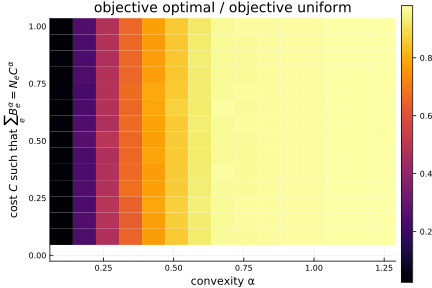

In [21]:
heatmap(x, y, means./means_unif, fmt=:svg)
xlabel!("convexity α")
ylabel!(L"cost $C$ such that $\sum_{e}B_{e}^\alpha = N_e C^\alpha$")
title!("objective optimal / objective uniform")

savefig("plots/comparison_cost_constraint_2.pdf")
plot!()

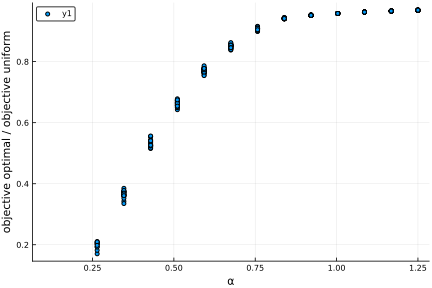

In [83]:
scatter(all_α, variances./variances_uniform, fmt=:svg)
xlabel!("α")
ylabel!("objective optimal / objective uniform")

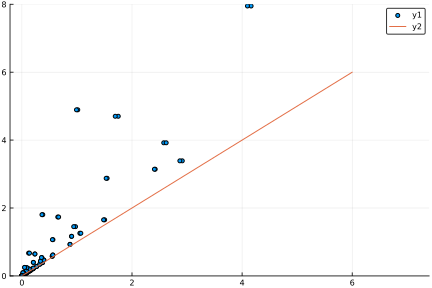

In [89]:
scatter(variances, variances_uniform, fmt=:svg)
plot!(linspace(0,6), linspace(0,6))
ylims!(0, 8)

Extra: Ornstein-Uhlenbeck $\tau$ vs. $C$
===

In [59]:
function sample_ornstein_uhlenbeck_vs_cost(R, N, samples, topol)
    power_flows = NetworkOptimization.ornstein_uhlenbeck_synchronous
        
    τs = logspace(-2, 3, N)/γ
    α = 0.5
    b_facts = linspace(0.1, 2, N)

    tolerance = 1e-4

    all_b_facts = []
    all_τ = []
    variances = []
    results = []
    loops = []

    k = 0
    for (i, τ) in enumerate(τs)
        for (j, b_fact) in enumerate(b_facts)
            for l = 1:samples
                b₀ = rand(topol.edges)
                b₀ *= (b_fact*topol.edges/sum(b₀.^α))^(1./α)

                vari = NaN
                kura = NaN
                b_final = zeros(topol.edges)

                C = NetworkOptimization.OrnsteinUhlenbeckCorrelations(R, 1./τ)

                try
                    b_final, Δ_final = NetworkOptimization.optimize_synchronous_network(topol, power_flows, (C,),
                        α, b₀, b_fact*topol.edges, intermediate_diffs=false, tolerance=tolerance)

                    # BOTH must converge!
                    if Δ_final < tolerance
                        vari = NetworkOptimization.total_variance_ornstein_uhlenbeck(topol, C, b_final)
                    end
                catch e
                    # SingularException generally means that somehow the iteration did not converge
                    if !isa(e, Base.LinAlg.SingularException) && !isa(e, NLsolve.IsFiniteException)
                        println(typeof(e))
                        rethrow(e)
                    else
                        println(typeof(e))
                    end
                end

                push!(variances, vari)
                push!(results, b_final)

                push!(all_b_facts, b_fact)
                push!(all_τ, τ)

                push!(loops, OscillatorNetworks.loops(topol, b_final))

                print(k, ", ")
                k += 1
            end
        end
    end
   
    return all_b_facts, all_τ, variances, results, loops
end

sample_ornstein_uhlenbeck_vs_cost (generic function with 1 method)

In [60]:
all_b_facts, all_τ, variances, results, loops = sample_ornstein_uhlenbeck_vs_cost(R_uncor, 25, 10, topol)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717

2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083

4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294, 4295, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449

5649, 5650, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5697, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719, 5720, 5721, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815

(Any[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], Any[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02  …  2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0], Any[1.05613, 1.048, 1.05501, 1.04779, 1.05914, 1.04781, 1.05028, 1.0501, 1.0678, 1.05105  …  0.0129178, 0.0125512, 0.012532, 0.0131571, 0.0130569, 0.0124699, 0.0120937, 0.0122623, 0.0125354, 0.0129097], Any[[0.0449424, 0.0, 0.044584, 0.0422943, 0.0270369, 0.0, 0.0490093, 0.0, 0.0318268, 0.0203934  …  0.0, 0.0581405, 0.0449424, 0.0343767, 0.0459599, 0.052363, 0.0422764, 0.0381354, 0.0449211, 0.0], [0.0267054, 0.0282197, 0.0328812, 0.0, 0.0194048, 0.0, 0.0388796, 0.0, 0.0493572, 0.0242814  …  0.0255184, 0.0, 0.0258906, 0.0173359, 0.0, 0.0372884, 0.0384425, 0.0416281, 0.0440153, 0.034568], [0.0307248, 0.0209385, 0.032898, 0.0, 0.0369877, 0.0, 0.0325442, 0.0, 0.040939, 0.0179246  …  0.0, 0.0, 0.0305578, 0.034641, 0.0329624, 0.0299933, 0.

In [65]:
mean_weighted_degrees = [mean(abs.(topol.E)*r) for r in results]
std_weighted_degrees = [std(abs.(topol.E)*r) for r in results]

mean_degrees = [mean(abs.(topol.E)*(r .> 1e-6)) for r in results]
std_degrees = [std(abs.(topol.E)*(r .> 1e-6)) for r in results]

# save data
data = hcat(all_τ, all_b_facts, variances, [l for (l, _) in loops], [l for (_, l) in loops], mean_weighted_degrees, std_weighted_degrees, mean_degrees, std_degrees)
writecsv("data/phase_diagram_ou_cost_dependence_$(grid_type)_$(netw_size).csv", data)
writecsv("data/phase_diagram_ou_cost_dependence_$(grid_type)_$(netw_size)_networks.csv", results)

In [66]:
fℓ = [l0/l1 for (l0,l1) in loops]
spread = [mean(r)/std(r) for r in results]

x, y, means_fℓ, _ = average_grid(all_b_facts, all_τ, fℓ)
x, y, means_spread, _ = average_grid(all_b_facts, all_τ, spread)

([0.1, 0.179167, 0.258333, 0.3375, 0.416667, 0.495833, 0.575, 0.654167, 0.733333, 0.8125  …  1.2875, 1.36667, 1.44583, 1.525, 1.60417, 1.68333, 1.7625, 1.84167, 1.92083, 2.0], [0.02, 0.032312, 0.0522031, 0.0843393, 0.136258, 0.220139, 0.355656, 0.574597, 0.928318, 1.49979  …  26.6704, 43.0887, 69.614, 112.468, 181.704, 293.56, 474.275, 766.237, 1237.93, 2000.0], [1.02211 1.02099 … 1.03168 1.03836; 1.04332 1.04379 … 1.02692 1.02743; … ; 0.708136 0.703838 … 0.683131 0.731343; 0.719681 0.700768 … 0.722046 0.712882], [0.0274904 0.025173 … 0.0265153 0.029638; 0.0330767 0.0201376 … 0.0284319 0.0228567; … ; 0.0533707 0.0450323 … 0.0415988 0.0450147; 0.0457138 0.058708 … 0.0372816 0.0466134])

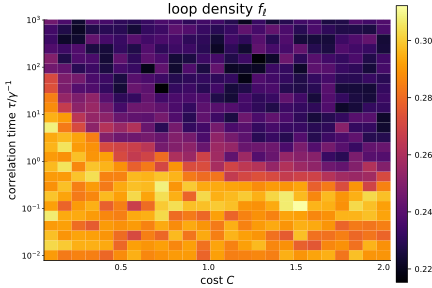

In [73]:
k = 0.5^2/(1*(1 + 0.5))

Cs = linspace(0.05, 2.05)
taus = 2./(sqrt.(0.5^2 + 4*0.5*Cs/k) - 0.5)

heatmap(x, y*0.5, means_fℓ, yscale=:log10, fmt=:svg)
# plot!(Cs, taus, yscale=:log10, color=colorant"black", label="iso-statistic (theoretical)")

xlabel!(L"cost $C$")
ylabel!(L"correlation time $\tau/\gamma^{-1}$")
title!(L"loop density $f_\ell$")

savefig("plots/loop_density_ou_cost_vs_correlation_$(netw_size).pdf")
plot!()

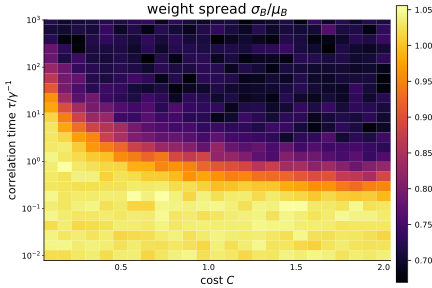

In [72]:
k = 0.5^2/((1 + 0.5))

Cs = linspace(0.05, 2.05)
taus = 2./(sqrt.(0.5^2 + 4*0.5*Cs/k) - 0.5)

heatmap(x, y*0.5, means_spread, yscale=:log10, fmt=:svg)
# plot!(Cs, taus, yscale=:log10, color=colorant"black", label="iso-statistic (theoretical)")
xlabel!(L"cost $C$")
ylabel!(L"correlation time $\tau/\gamma^{-1}$")
title!(L"weight spread $σ_B/μ_B$")

savefig("plots/weight_spread_ou_cost_vs_correlation_$(netw_size).pdf")
plot!()